# Итоговый проект по курсу "Python для анализа данных"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
plt.style.use('dark_background')

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой. \
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

## 1 Задание
Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/westooon/PyDa_Diplom_work/main/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2 Задание
Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

Расчет среднего, медианы, мин, макс, сред.отклонения для количественных переменых.

In [3]:
base_stat = df.describe().loc[['mean', 'min', 'max', 'std']].round(3)
base_stat.loc['median'] = df[base_stat.columns].median()
base_stat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
median,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000


Мода для качественных признаков

In [5]:
mode_ = df[['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']].mode()
mode_

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


## 3 Задание
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

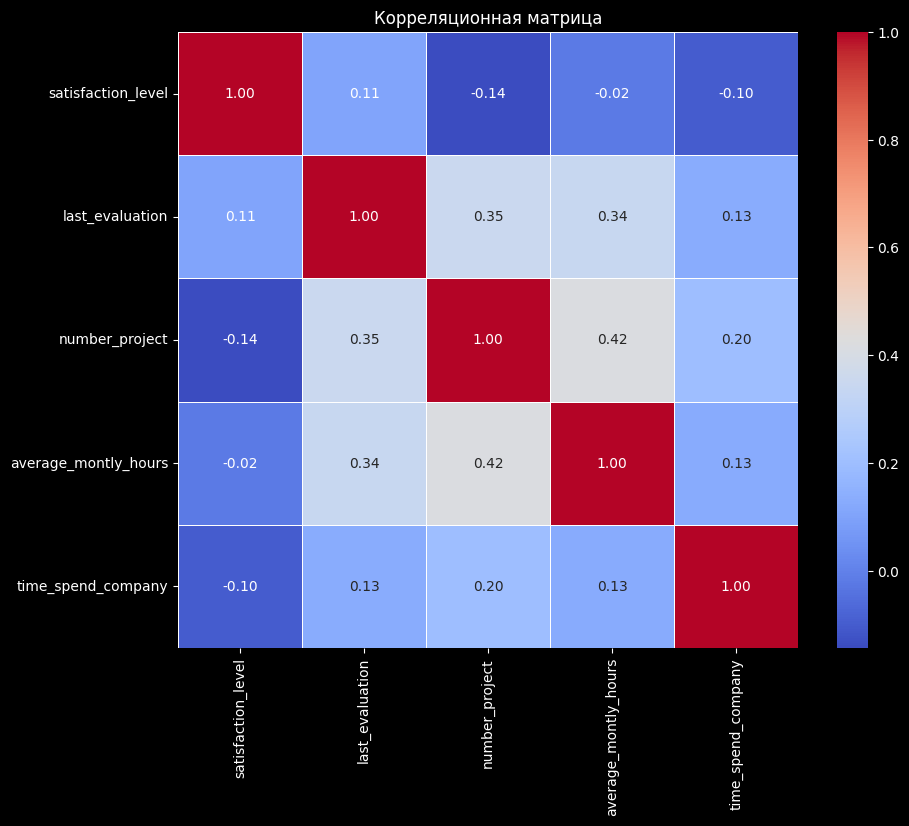

In [6]:
num_col = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'] #количественные переменные
corr_matrix = df[num_col].corr()

# Визуализирую корреляционную матрицу с помощью heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Две самые скоррелированные переменные:

1. `Среднее количество часов работы в месяц` и `количество проектов`  0.42
2. `Время с момента последней оценки в годах` и `количество проектов` 0.35

Две наименее скоррелированные переменные


1. `Среднее количество часов работы в месяц` и `уровень удовлетворенности` -0.02
2. `Уровень удовлетворенности` и `стаж работы в компании` -0.10




## 4 Задание
Рассчитайте сколько сотрудников работает в каждом
департаменте

In [7]:
dep = df.groupby('department').size().reset_index()
dep.rename(columns={0:'count'})

,department,count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


## 5 Задание
Показать распределение сотрудников по зарплатам.

In [8]:
df['salary'].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


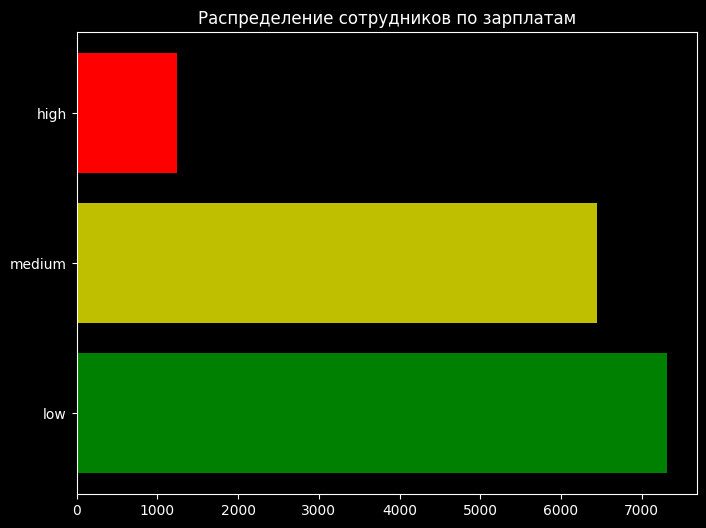

In [ ]:
categories = df['salary'].value_counts().index
values = df['salary'].value_counts()
colors = ['g', 'y', 'r']

plt.figure(figsize=(8, 6))
plt.title('Распределение сотрудников по зарплатам')

plt.barh(categories, values,color=colors)

plt.show()

## 6 Задание
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [ ]:
dep_by_sal = df.groupby('department')['salary'].value_counts().unstack() #распределение сотрудников по зарплатам в каждом департаменте
dep_by_sal = dep_by_sal.reindex(columns=['low', 'medium', 'high']) # сортировка стобцов от low до high
dep_by_sal

salary,low,medium,high
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


Визуализация

In [ ]:
dep_by_sal = df.groupby('department')['salary'].value_counts(normalize=True).unstack() #распределение сотрудников по зарплатам в каждом департаменте в %
dep_by_sal = dep_by_sal.reindex(columns=['low', 'medium', 'high']) # сортировка стобцов от low до high

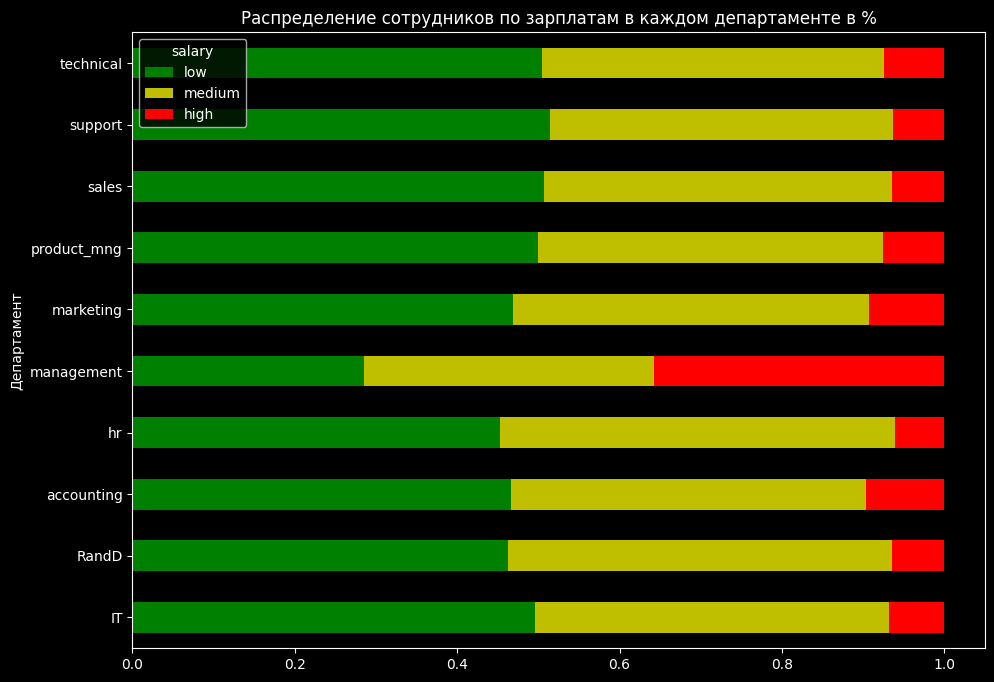

In [ ]:
dep_by_sal.plot(
       kind='barh',
       stacked=True,
       figsize=(11, 8),
       color=['g','y','r'],
       ylabel='Департамент',
       title='Распределение сотрудников по зарплатам в каждом департаменте в %')

plt.show()

## 7 Задание
Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
# Разделение на 2 выборки.Сотрудники с низким и высоким уровнем дохода.
low_salary = df[df['salary'] == 'low']['average_montly_hours']
high_salary = df[df['salary'] == 'high']['average_montly_hours']

Проверка на нормальность распределениия данных, для определения выбора теста.

In [ ]:
def check_normality(data):
    # Проведение теста Шапиро-Уилка
    res = st.shapiro(data)

    # Интерпретация результата
    print('p-value =', round(res.pvalue, 3))

    alpha = 0.05
    if res.pvalue < alpha:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
check_normality(low_salary)

p-value = 0.0
Отклоняем нулевую гипотезу >> Данные распределены не нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
check_normality(high_salary)

p-value = 0.0
Отклоняем нулевую гипотезу >> Данные распределены не нормально


Гипотезы:\
H0 - Среднее время, проведенное на работе сотрудниками с высоким и низким окладом, одинаково.\
H1 - Среднее время, проведенное на работе сотрудниками с высоким и низким окладом, различается.

In [ ]:
# Тест Манна-Уитни
_, p = st.mannwhitneyu(low_salary, high_salary)

print(f"p = {p:.5f}")

alpha = 0.05
if p > alpha:
    print('Принимаем Н0')
else:
    print('Принимаем H1')

p = 0.82413
Принимаем Н0


Вывод:\
 Нет статистически значимых отличий между проведенным временем на работе и уровнем з/п.

## 8 Задание
Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности): \
Доля сотрудников с повышением за последние 5 лет \
Средняя степень удовлетворенности \
Среднее количество проектов \

In [ ]:
# Разделение на две группы: уволившиеся и не уволившиеся сотрудники

left_0 = df[df['left'] == 0] # не уволившиеся
left_1 = df[df['left'] == 1] # уволившиеся

Доля сотрудников с повышением за последние 5 лет

In [ ]:
print(f'Доля сотрудников с повышением за последние 5 лет среди оставшихся {left_0.promotion_last_5years.mean():.3f}')
print(f'Доля сотрудников с повышением за последние 5 лет среду уволившихся {left_1.promotion_last_5years.mean():.3f}')

Доля сотрудников с повышением за последние 5 лет среди оставшихся 0.026
Доля сотрудников с повышением за последние 5 лет среду уволившихся 0.005


Средняя степень удовлетворенности

In [ ]:
print(f'Средняя степень удовлетворенности сотрудников с повышением за последние 5 лет среди оставшихся: {left_0.satisfaction_level.mean():.3f}')
print(f'Средняя степень удовлетворенности сотрудников с повышением за последние 5 лет среди уволившихся: {left_1.satisfaction_level.mean():.3f}')

Средняя степень удовлетворенности сотрудников с повышением за последние 5 лет среди оставшихся: 0.667
Средняя степень удовлетворенности сотрудников с повышением за последние 5 лет среди уволившихся: 0.440


Среднее количество проектов

In [ ]:
print(f'Среднее количество проектов сотрудников с повышением за последние 5 лет среди оставшихся: {left_0.number_project.mean():.3f}')
print(f'Среднее количество проектов сотрудников с повышением за последние 5 лет среди уволившихся: {left_1.number_project.mean():.3f}')

Среднее количество проектов сотрудников с повышением за последние 5 лет среди оставшихся: 3.787
Среднее количество проектов сотрудников с повышением за последние 5 лет среди уволившихся: 3.856


## 9 Задание
Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

Подготовка.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [ ]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

Разделение данных на тестовую и обучающую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Создание модели LDA

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Оценка качества модели

In [ ]:
predictions = lda.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
lda.coef_

array([[-4.52751283e+00,  5.48160144e-01, -2.28532712e-01,
         3.89172739e-03,  2.36002706e-01, -1.06930534e+00,
        -1.20952708e+00]])

In [ ]:
lda.intercept_

array([0.31907709])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2853
           1       0.49      0.27      0.35       897

    accuracy                           0.76      3750
   macro avg       0.65      0.59      0.60      3750
weighted avg       0.73      0.76      0.73      3750



## 10 Задание
Загрузить jupyter notebook с решение на github и прислать ссылку

In [ ]:
https://github.com/westooon/PyDa_Diplom_work/blob/main/PyDa_Diplom.ipynb